
# The Central Limit Theorem

- [Introduction](#intro)
- [Binomial distribution to Gauss distribution](#bi_to_normal)
- [The Central Limit Theorem](#clt)
- [Uniform distribution to Gauss distribution](#uni_to_normal)
- [Extra](#extra)

<div id="intro" />

## Introduction

We will introduce the "Central Limit Theorem", which is probably the single most important theorem in the theory of probability. 

The theorem helps to explain why the Gaussian or Normal distribution finds such widespread applications in natural and social sciences. Briefly stated, it says that **the sum of N independent random variables**, which can be drawn from any arbitrary, but well behaved distributions, **will converge to a Gaussian distribution in the limit of large N**.

<div id="bi_to_normal" />

## Binomial distribution $\rightarrow$ Gauss distribution

The binomial distribution P(n,M), which describes a random process with two possible outcomes. The standard example is that of a coin toss, which can come up heads with probability $p$, and tails with probability $(1-p)$.

The probability to observe $n$ heads after $M$ throws is given by equation (C1). In the limit when both $n$ and $M$ are very large, we have seen that the binomial distribution converges to the Gaussian distribution with average $\mu_1 = M p$ and variance $\sigma^2 = M p (1-p)$. This is a trivial application of the central limit theorem. It works, because the result of each coin toss is given by an independent random process with a well defined average and variance.

The binomial distribution becomes equivalent to the Gaussian distribution in the limit $n, M\gg 1$, as shown in the 1st plot of this week.

\begin{equation}
P(n)=\frac{M!}{n!(M-n)!}{{p}^{n}}{{(1-p)}^{M-n}}\tag{C1}
\end{equation}

\begin{equation}
\hspace{20mm}
\xrightarrow[n\to cont.]{n,M\gg 1}\ 
% P(n)=
\frac{1}{\sqrt{2\pi {{\sigma }^{2}}}}\exp \left[ -\frac{{{(n-{{\mu }_{1}})}^{2}}}{2{{\sigma }^{2}}} \right]\tag{C2}
\end{equation}

\begin{equation}
\hspace{20mm}
\mu_1=Mp,\ \ \ \ 
\sigma^2=Mp(1-p) \tag{C3, C4}
\end{equation}

##### Numerical experiment 1

Let us examine this by performing numerical experiments for various values of $M=1,2,4,10,100$ and $1000$.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Probability P = 0.5 ; Number of tosses M = 50


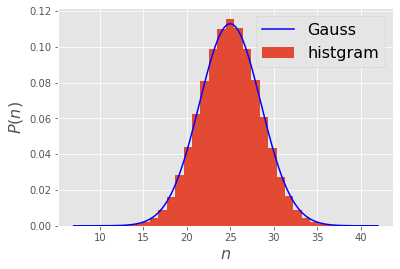

In [2]:
p = 0.5
M = 50
N = 100000
ave = M*p
std = np.sqrt(M*p*(1-p))
print("Probability P =", p,"; Number of tosses M =", M)

np.random.seed(0)

# Binomial function
X = np.random.binomial(M, p, N)

nmin = np.int(ave-std*5)
nmax = np.int(ave+std*5)
nbin = nmax - nmin + 1
plt.hist(X, range=[nmin,nmax], bins=nbin, density=True)
x = np.arange(nmin, nmax, 0.01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical distribution

plt.plot(x, y, color="b")
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$P(n)$", fontsize=16)
plt.legend([r"Gauss", r"histgram"], fontsize=16)
plt.show()

You should repeat this experiment for several values of `M = [1, 2, 4, 10, 100, 1000]`, to see how the histogram converges towards the Gauss distribution. The convergence is assured in the limit of large n and M. In practice, you can know how large should M be for the two distributions to match.

#### What we can learn from the experiment

Let us discuss what we have seen in the experiments.

First we define a stochastic variable "s" which is a result of single binary choice from 0 or 1. The total number of heads, after M tosses, is given by the sum of all "s" from the 1st to the M-th choices. This defines a new stochastic variable $n^M$.

Stochastic variable "$s$" is a result of single binary choice, 

\begin{equation}
s=0\ {\rm or}\ 1 
%\tag{D1}
\end{equation}

and Stochastic variable "$n^{M}$" is a sum of $M$ independent binary choices $s$, with the index $j$ representing the $j$-th choice.

\begin{equation}
%\color{red}
{
n^{M}=\sum^{M}_{j=1}s_j} 
%\tag{D4}
\end{equation}

- **$M=1$**

Consider the case of a single coin toss for M=1, for which n of M is the same as a single binary choice $s$ as shown in Eq.(D1). Since this random variable is drawn from a binomial distribution, the average and variance are given by equations (D2) and (D3). Namely, the average number of heads, from one coin toss is equal to p, and the variance is equal to p*(1-p).

\begin{equation}
n^{M=1}=s_1=s=0\ {\rm or}\ 1 
\tag{D1}
\end{equation}

Distribution function $\rightarrow$ Binary choice,

$P^{M=1}(0)=1-p, \ P^{M=1}(1)=p, $ with

\begin{equation}
\hspace{15mm}\mu^{M=1}_1=p, \hspace{23mm} \sigma_{M=1}^2=p(1-p) \tag{D2, D3}
\end{equation}

- **$M\gg 1$**

Now, consider the case for arbitrary M. As we already discussed above, n of M is given by the sum all "s" up to the M-th choices, or equivalently as the sum of M independent single coin toss results n of M=1 as shown in Eq.(D4). In the limit when M is very large, we have already proven that this converges to a Gaussian. The average and variance of this distribution, is just the average and variance of the distribution for a single coin toss multiplied by M, shown in Eqs.(D5) and (D6).

\begin{equation}
n^{M}=\sum^{M}_{j=1}s_j=\sum^{M}_{j=1}n^{M=1}_j  
\tag{D4}
\end{equation}

Distribution function $\rightarrow$ Gaussian with

\begin{equation}
%\hspace{20mm}
\mu^{M\gg1}_1=M\mu^{M=1}_1,\hspace{20mm} \sigma_{M\gg1}^2=M\sigma_{M=1}^2 
\tag{D5, D6}
\end{equation}

<div id="clt" />

## The Central Limit Theorem (CLT)

### Generalization of Eqs. (D4-D6) for $M\gg 1$ 

The previous relation between binomial and Gaussian distributions is in fact an example of the Central Limiting Theorem. It is not valid only for the sum of random variables drawn from binomial distributions, but is applicable to any distributions with finite variance. Thus, if we have a set of $M$ independent random variables, $n$ of $M=1$, with average and variance $\mu_1$ and $\sigma^2$ of $M=1$.

#### CLT for sum of stochastic variables

Stochastic variable $n^M$ as a **SUM** of any $M$ independent stochastic variables $n^{M=1}$ with $\mu_1^{M=1}$ and $\sigma_{M=1}^2$,

\begin{equation}
n^{M}=\sum^{M}_{j=1}n^{M=1}_j \tag{D7}
\end{equation}
- Distribution function $\rightarrow$ Gauss with

\begin{equation}
%\hspace{20mm}
{
\mu^{M\gg1}_1=M\mu^{M=1}_1,\hspace{20mm} \sigma_{M\gg1}^2=M\sigma_{M=1}^2} \tag{D8, D9}
\end{equation}

The sum of these random variables is itself a random variable, and in the limit when $M$ is very large, it converges to a Gaussian distribution. The average and variance of n of $M >> 1$, which is the sum of the $M$ independent random variables, is given by Eqs.(D8) and (D9) which are generalizations of Eq.(D5) and (D6). 

The average and variance of this sum are then $M$ times the average and variance of the individual distribution.

#### CLT for average of stochastic variables

Stochastic variable $n^M$ as an **AVERAGE** of any $M$ independent stochastic variables with $\mu^{M=1}$ and $\sigma_{M=1}^2$,

\begin{equation}
n^{M}=\frac{1}{M}\sum^{M}_{j=1}n^{M=1}_j \tag{D10}
\end{equation}
- Distribution function $\rightarrow$ Gauss with

\begin{equation}
%\hspace{20mm}
{
\mu^{M\gg1}_1=\mu^{M=1}_1,\hspace{20mm} \sigma_{M\gg1}^2=\frac{\sigma_{M=1}^2}{M}} \tag{D11, D12}
\end{equation}

One of the most useful forms of the CLT appears when considering the average of a series of stochastic variables, not just the sum. 

As before, let $n_j$ of $M=1$ be a series of stochastic variables. We assume they have average and variance of $\mu_1$ and $\sigma^2$ of $M=1$. They should be independent and identically distributed, but other that that they can be drawn from any distribution with a finite variance. The average of these stochastic variables is given by the weighted sum in Eq.(D10). Apart from the factor of 1/M, this is exactly the same as we considered in the previous example.

Now, we know that in the limit of very large $M$, the distribution of this variable converges to a Gaussian. However, because of the 1/M factor in Eq.(D10), the average and variance are now given by Eq.(D11) and (D12). Notice that the average value of $n$ of $M$ is now equal to the average value of the n of $M=1$. More importantly, the variance of $n$ of $M$ is the variance of $n$ of $M=1$ divided by $M$.

Eqs. (D7-D12) is called "the central limiting theorem".

<div id="uni_to_normal" />

## Uniform distribution $\rightarrow$ Gauss distribution

Let us see another example of the CLT in practice. Now, instead of a binomial distribution, let us consider a continuous uniform distribution.

### From CLT

- **$M=1$**

Stochastic variable "$x$" is uniformly distributed between 0 and 1, 

\begin{equation}
x^{M=1}\in[0:1]
\tag{D13}
\end{equation}

Distribution function:

$P^{M=1}(x)=1 \ ({\rm for\ } 0\le x < 1),\ P^{M=1}(x)=0\ {\rm (otherwise)}$

\begin{equation}
\hspace{15mm}\mu^{M=1}_1=\frac{1}{2}, \hspace{23mm} \sigma_{M=1}^2=\frac{1}{12} \tag{D14, D15}
\end{equation}

- **$M\gg 1$**

Stochastic variable "$x$" is a sum of $M$ independent uniform random numbers

\begin{equation}
{
x^{M}=\sum^{M}_{j=1}x^{M=1}_j} \tag{D16}
\end{equation}

Distribution function $\rightarrow$ Gauss with

\begin{equation}
%\hspace{20mm}
{
\mu^{M\gg1}_1=M\mu^{M=1}_1=\frac{M}{2},\hspace{20mm} \sigma_{M\gg1}^2=M\sigma_{M=1}^2}=\frac{M}{12} \tag{D17, D18}
\end{equation}

We define a stochastic variable $x$ of $M=1$, which is uniformly distributed between the unit interval. Thus, the probability density of observing any value $x$ is constant and equal to one, if $x$ lies in the unit interval, and zero if it is outside. The average and the variance can be easily calculated analytically, and are given by 1/2 and 1/12 respectively.

Now, define a new stochastic variable $x$ of $M$, which is the sum of $M$ of these uniform random variables. In the limit when $M$ is very large, $x$ of $M$ is described by a Gaussian distribution with average and mean given by Eqs. (D8) and (D9). In this case, the average is just M/2 and the variance M/12.

##### Numerical experiment 2

In this numerical experiment, we will verify that the sum of uniformly distributed random numbers converges to a Gaussian distribution with average and variance defined in Eqs.(D17) and (D18).

You should try with several values of M, such as `M = [1, 2, 4, 10, 100]` to see how the distribution converges to a Gaussian. Thus, one experimental run consists of generating M random variables, and adding them to generate a sample for the cumulative variable. 

As you should see for yourselves, adding just 10 uniform random variables is already enough to reproduce a Gaussian distribution.

Number od random variables M = 10


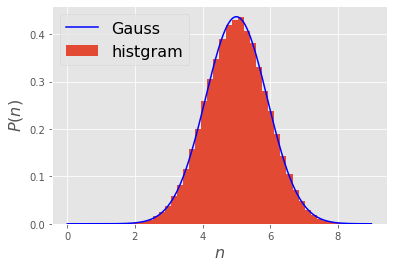

In [3]:
M = 10    # set M, the number of random variables to add. We can change this value
N = 100000 # number samples to draw, for each of the random variables
ave = M/2
std = np.sqrt(M/12)
print("Number od random variables M =", M)

np.random.seed(0)
X = np.zeros(N)
for i in range(N):
    X[i] += np.sum(np.random.rand(M)) # draw a random numbers for each of the x_i and add to get new value for x = \sum x_i

nmin = np.int(ave - std*5)
nmax = np.int(ave + std*5)
plt.hist(X, range=[nmin, nmax], bins=50, density=True)

x = np.arange(nmin, nmax, 0.01/std) 
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical distribution
plt.plot(x, y, color="b")
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$P(n)$", fontsize=16)
plt.legend([r"Gauss", r"histgram"], fontsize=16)
plt.show()

<div id="extra" />

## Extra

- Generate $N=10^5$ random numbers from a gaussian distribution. Calculate the percentage of points that are within one, two, three and four standard deviations from the average. 
- Imagine you have a distribution for a random variable that has the characteristic shape of a gaussian. Looking at the distribution near the tails, you notice that $0.01$ percent of the points are more than $5\sigma$ away from the average. Can you say that the distribution is Gaussian?  NO

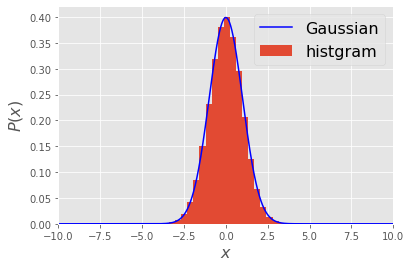

Percentage of points that are within two standard desviations:  0.95442


In [4]:
ave = 0.0
std = 1.0
N = 100000
np.random.seed(0)
X = ave+std*np.random.randn(N)

plt.hist(X, bins=25, density=True)
x = np.arange(-10, 10, 0.01)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

plt.xlim(-10, 10)
plt.plot(x, y, color="b")
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$P(x)$",fontsize=16)
plt.legend([r"Gaussian", r"histgram"], fontsize=16)
plt.show()

# Percentage of points that are within two standard desviations
k = 0
for i in range(0, len(X)):
    if abs(X[i]) < 2*std:
        k += 1

print("Percentage of points that are within two standard desviations: ", k/N)